# PROJECT 1
## PROBLEM STATEMENT

**1. Understand the dataset:**
>a. Identify the shape of the dataset  
b. Identify variables with null values  
c. Identify variables with unique values  

**2. Generate a separate dataset for numerical and categorical variables**  
**3. EDA of numerical variables:**
>a. Missing value treatment  
b. Identify the skewness and distribution  
c. Identify significant variables using a correlation matrix   
d. Pair plot for distribution and density  

**4. EDA of categorical variables**
>a. Missing value treatment  
b. Count plot and box plot for bivariate analysis  
c. Identify significant variables using p-values and Chi-Square values  

**5. Combine all the significant categorical and numerical variables**  

**6. Plot box plot for the new dataset to find the variables with outliers**

--------------------------------
<p/>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Load Data:**  
we load data here and start **Exploratory Data Annalysis**. 

In [2]:
df = pd.read_csv('PEP1.csv', index_col=['Id'])

In [3]:
df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [4]:
df.shape

(1460, 80)

In [5]:
df.isnull().any()[df.isnull().any()==True]

LotFrontage     True
Alley           True
MasVnrType      True
MasVnrArea      True
BsmtQual        True
BsmtCond        True
BsmtExposure    True
BsmtFinType1    True
BsmtFinType2    True
Electrical      True
FireplaceQu     True
GarageType      True
GarageYrBlt     True
GarageFinish    True
GarageQual      True
GarageCond      True
PoolQC          True
Fence           True
MiscFeature     True
dtype: bool

Text(0.5, 1.0, 'Features with the highest percentage of Nan values')

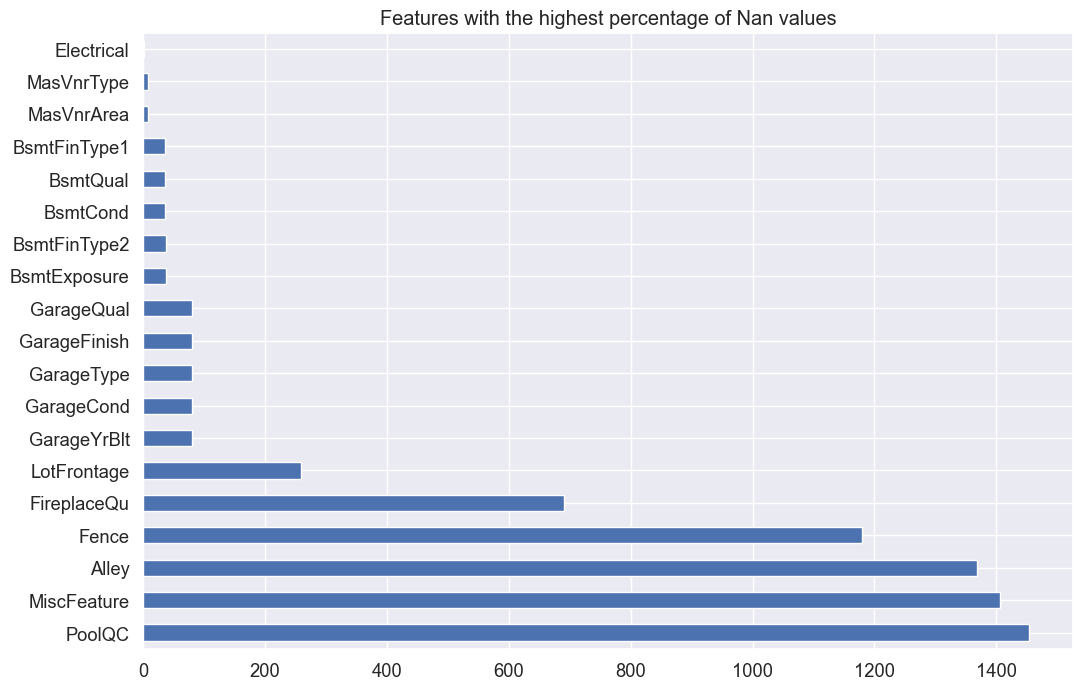

In [6]:
df_col_nan = df.isna().sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.2)
df_col_nan[df_col_nan > 0].plot(kind = "barh")
plt.title("Features with the highest percentage of Nan values")

In [7]:
na_cols = df.isna().sum()
print("The columns with NA values:\n")
print(na_cols[na_cols != 0].index)

The columns with NA values:

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


**Answer of part 2: separate dataset for numerical and categorical variables**

In [8]:
numerical_data = df.select_dtypes(exclude=[object])
categorical_data = df.select_dtypes(include=[object])

**Answer of part 1C**

In [9]:
categorical_data.nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functiol          7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

## Part 3

In [10]:
# treating numerical missing values

percent_numericaldata = (numerical_data.isnull().sum()/
                         numerical_data.isnull().count()).sort_values(ascending=False)

print(percent_numericaldata[percent_numericaldata>0])

LotFrontage    0.177397
GarageYrBlt    0.055479
MasVnrArea     0.005479
dtype: float64


**Filling missing numerical data with mean**

In [11]:
numerical_data.fillna(value=numerical_data.mean(), inplace=True)

In [12]:
numerical_data.isna().any()

MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchebvGr       False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice        False
dtype: bool

**No missing numerical data**

## treating categorical missing values
## Percentage of missing categorical data

In [13]:


percent_categoricaldata = (categorical_data.isnull().sum()/categorical_data.isnull().count()).sort_values(ascending=False)

print(percent_categoricaldata[percent_categoricaldata>0])


PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
GarageType      0.055479
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtQual        0.025342
BsmtCond        0.025342
MasVnrType      0.005479
Electrical      0.000685
dtype: float64


In [14]:
# I drop the columns with more than 80% missing values.

column_drop = percent_categoricaldata[percent_categoricaldata>0.8].index
categorical_data.drop(labels=column_drop, axis=1, inplace=True)


In [15]:
categorical_data.isna().sum().sort_values(ascending=False)[categorical_data.isna().sum()>0]

FireplaceQu     690
GarageCond       81
GarageQual       81
GarageFinish     81
GarageType       81
BsmtExposure     38
BsmtFinType2     38
BsmtCond         37
BsmtFinType1     37
BsmtQual         37
MasVnrType        8
Electrical        1
dtype: int64

**for the rest we replace it with mode**

In [16]:
categorical_data.fillna(categorical_data.mode().iloc[0],inplace=True)

In [17]:
categorical_data.isna().any()

MSZoning         False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinType2     False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
KitchenQual      False
Functiol         False
FireplaceQu      False
GarageType       False
GarageFinish     False
GarageQual       False
GarageCond       False
PavedDrive       False
SaleType         False
SaleCondition    False
dtype: bool

**now all the numerical and categorical filled. No missing data**

<br /> 

## Part 3 b: skewness and distribution


In [18]:
numerical_data.skew()

MSSubClass        1.407657
LotFrontage       2.384950
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.676412
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchebvGr        4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.668175
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
d

/Users/amintorabi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotArea', ylabel='Density'>

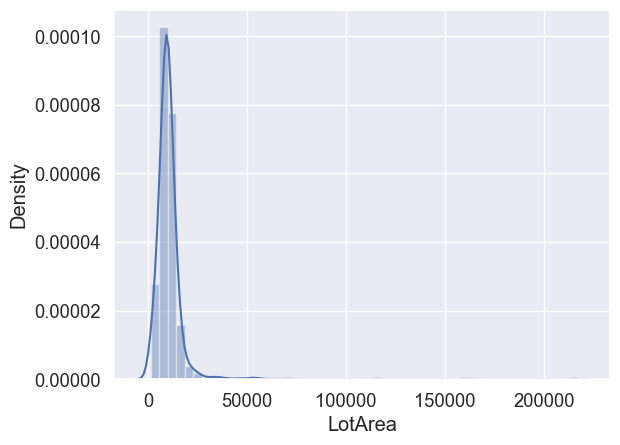

In [19]:
sns.distplot(numerical_data.LotArea)

## Correlation of sale price column greater than 0.5 or less than -0.5

In [20]:
condition = np.abs(numerical_data.corr().SalePrice)>0.5
var = numerical_data.corr().SalePrice[condition]
var

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

## Number of unique values in the column that found above (correlation 
## of sale price column greater than 0.5 or less than -0.5)

In [21]:
numerical_data[var.index].nunique()

OverallQual      10
YearBuilt       112
YearRemodAdd     61
TotalBsmtSF     721
1stFlrSF        753
GrLivArea       861
FullBath          4
TotRmsAbvGrd     12
GarageCars        5
GarageArea      441
SalePrice       663
dtype: int64

In [22]:
var2 = numerical_data[var.index].nunique()[numerical_data[var.index].nunique()>10].index

## Pairplot for numerical data with more than 10 unnique values

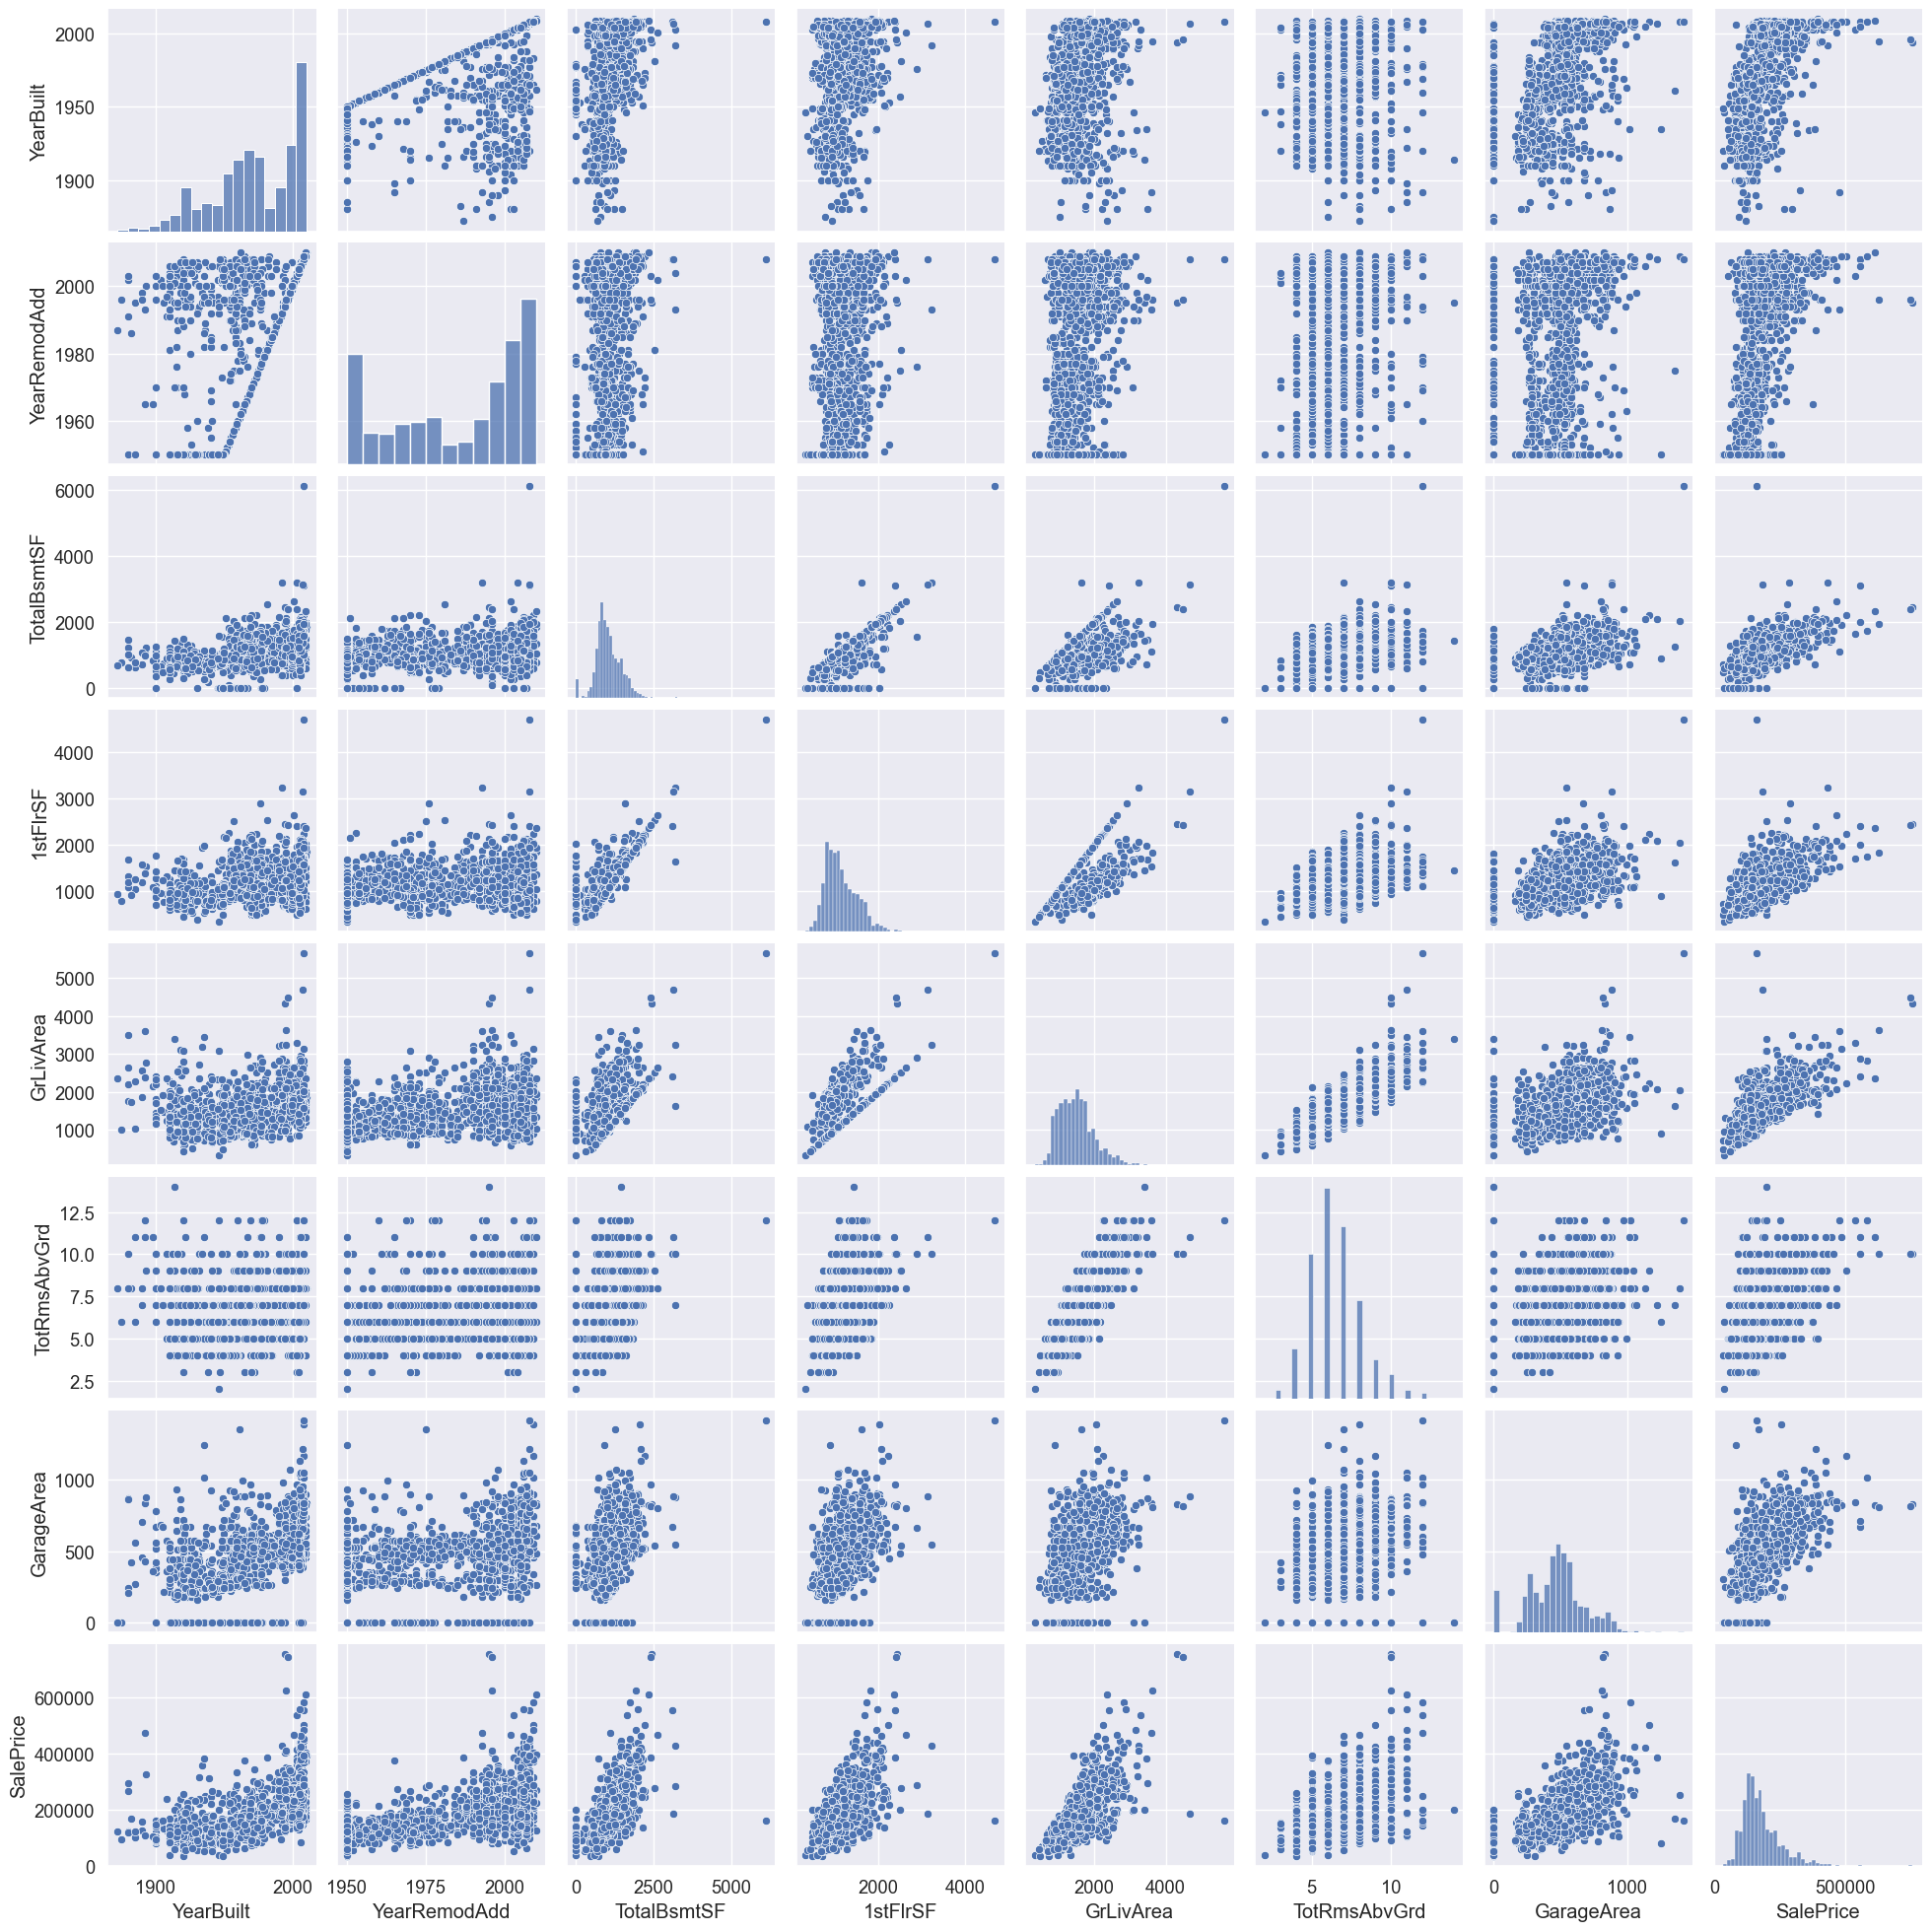

In [23]:
sns.pairplot(numerical_data[var2])

## Heatmap - Correlation

<AxesSubplot:>

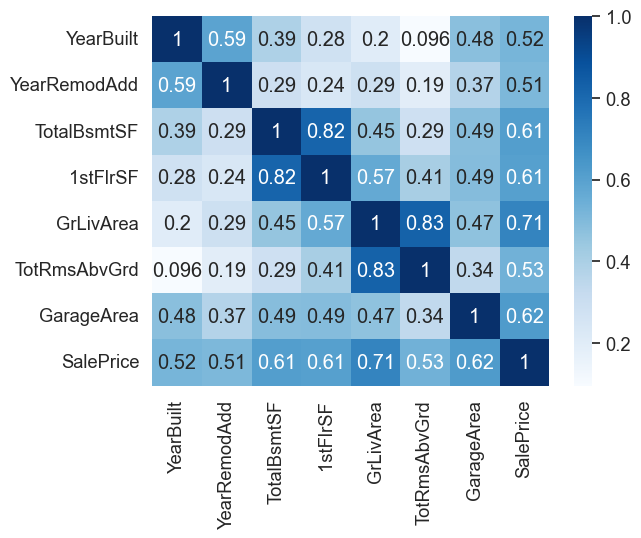

In [24]:
sns.heatmap(numerical_data[var2].corr(), cmap='Blues', annot=True)

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='count'>

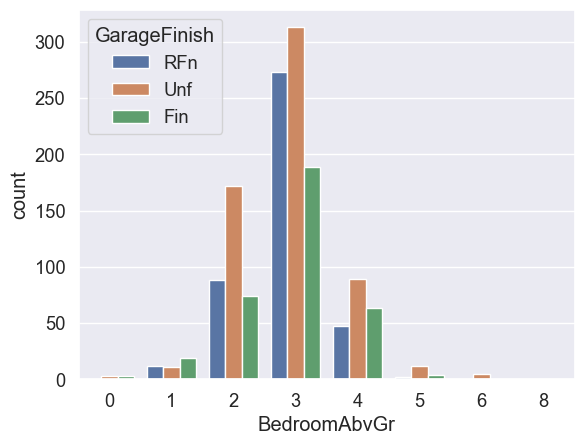

In [25]:
sns.countplot(x='BedroomAbvGr', data=df, hue='GarageFinish')

## Catplot- Bivariant

/Users/amintorabi/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 69.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


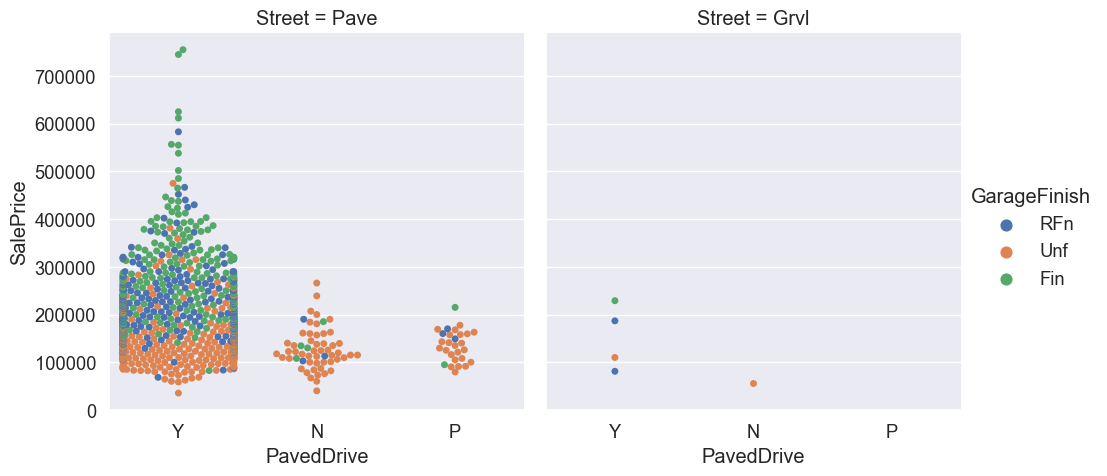

In [26]:
sns.catplot(y='SalePrice', x='PavedDrive', kind='swarm', hue='GarageFinish', col='Street', data=df)

## Countplot

<AxesSubplot:xlabel='SaleCondition', ylabel='count'>

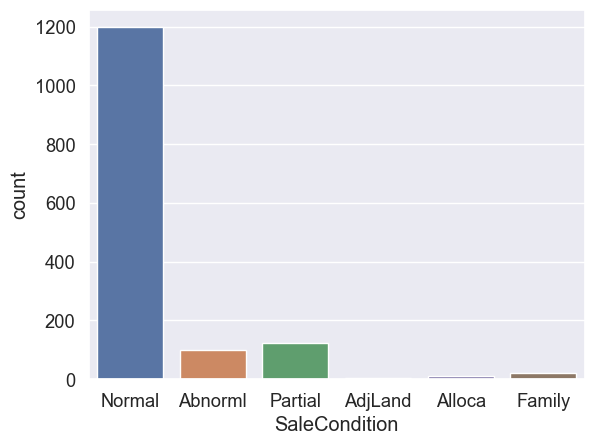

In [39]:
sns.countplot(x=df['SaleCondition'])

## Boxplot

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

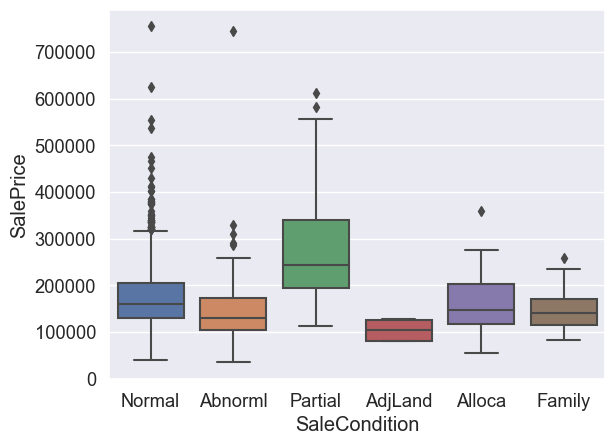

In [46]:
sns.boxplot(x=df['SaleCondition'],y=df['SalePrice'])

## Histogram

<AxesSubplot:xlabel='SaleCondition', ylabel='Probability'>

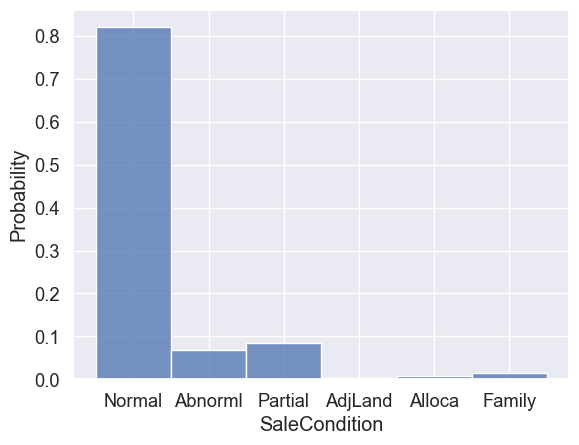

In [27]:
sns.histplot(x=df['SaleCondition'],stat='probability')

## Jointplot

<Figure size 1000x800 with 0 Axes>

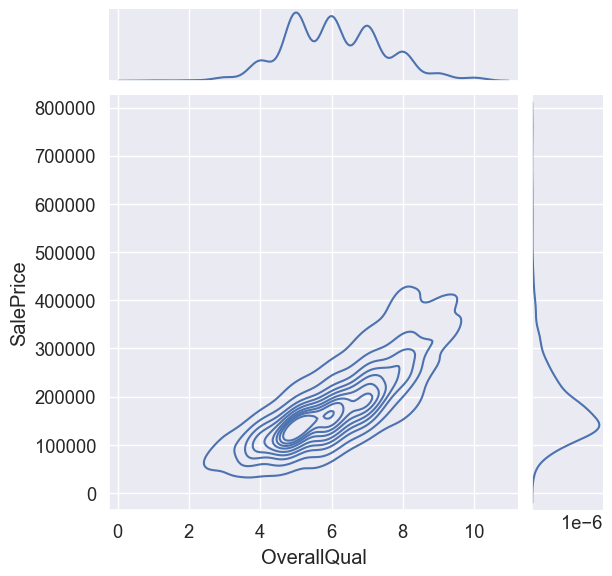

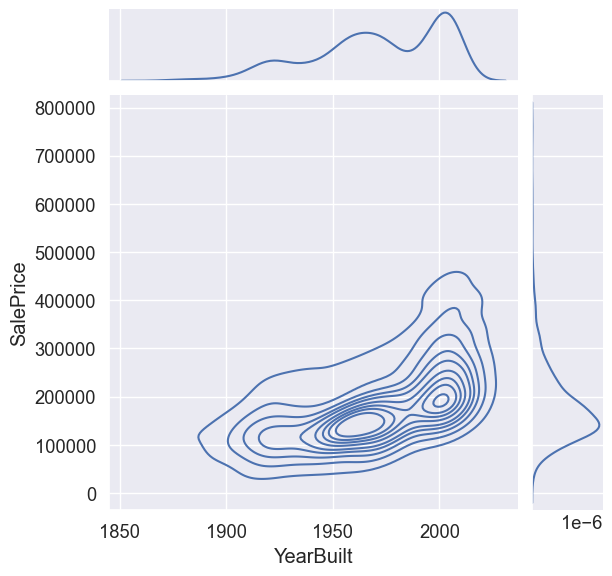

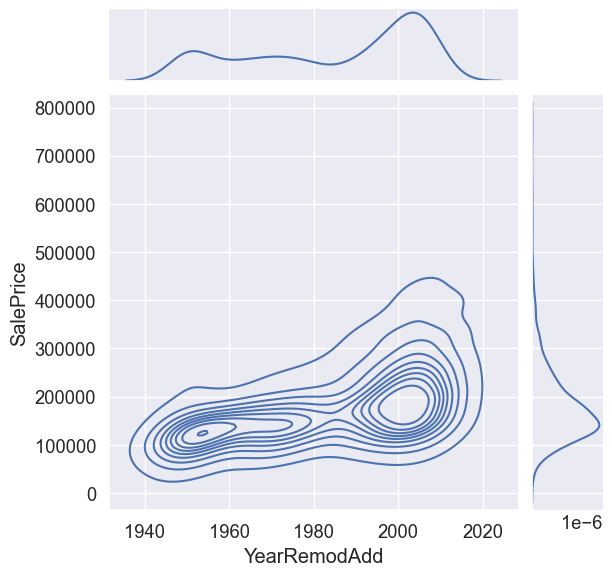

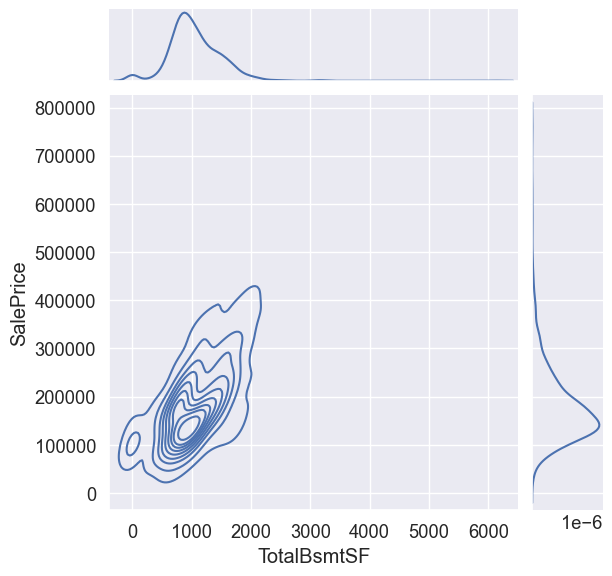

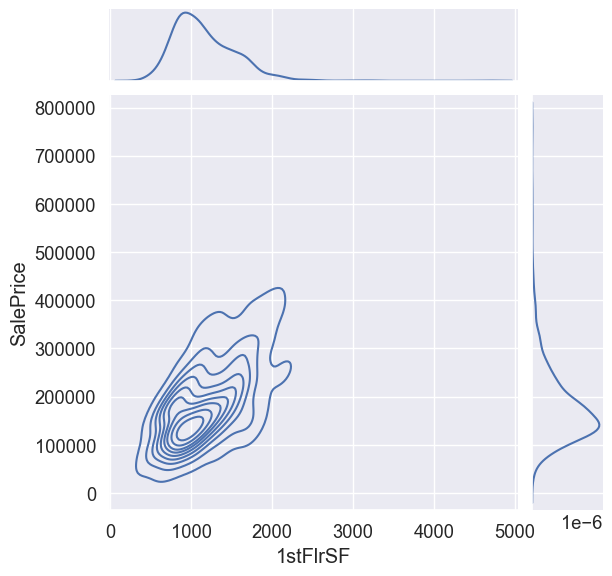

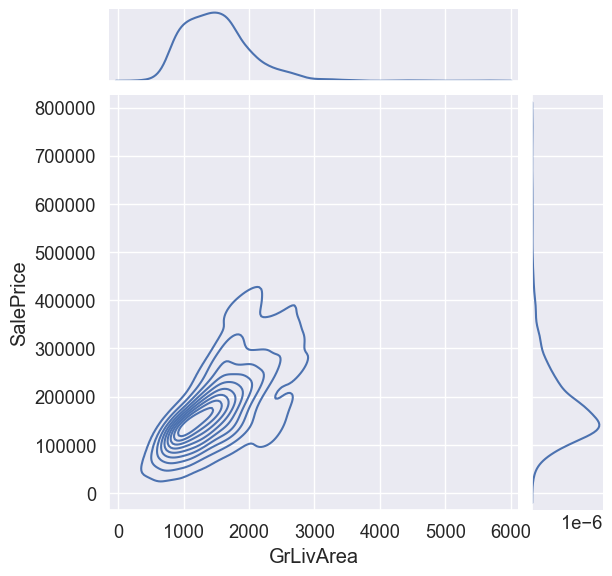

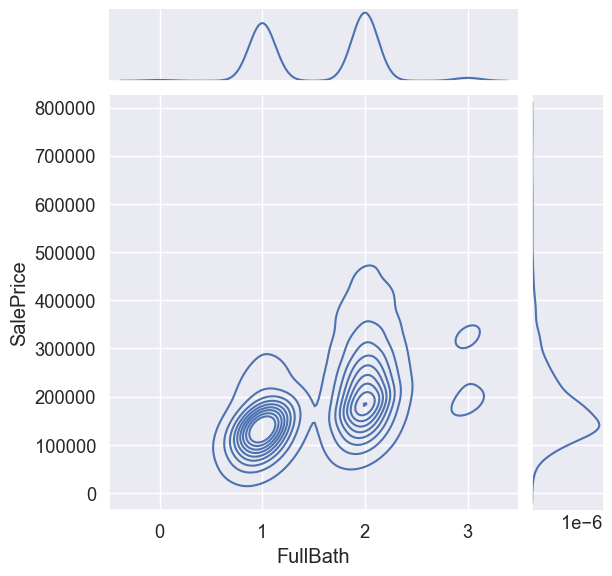

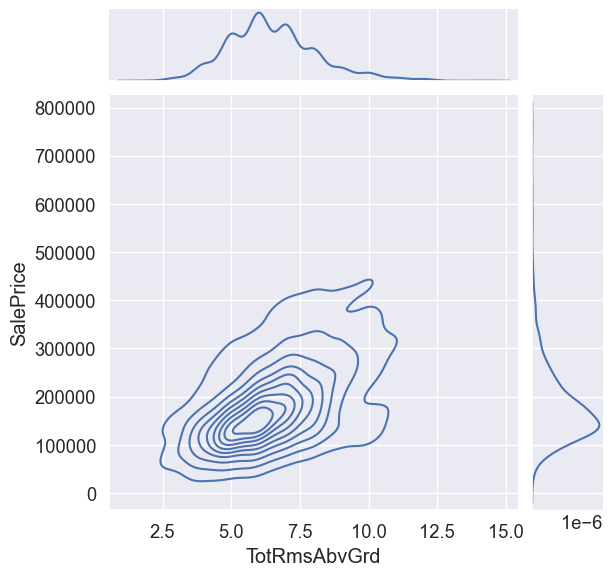

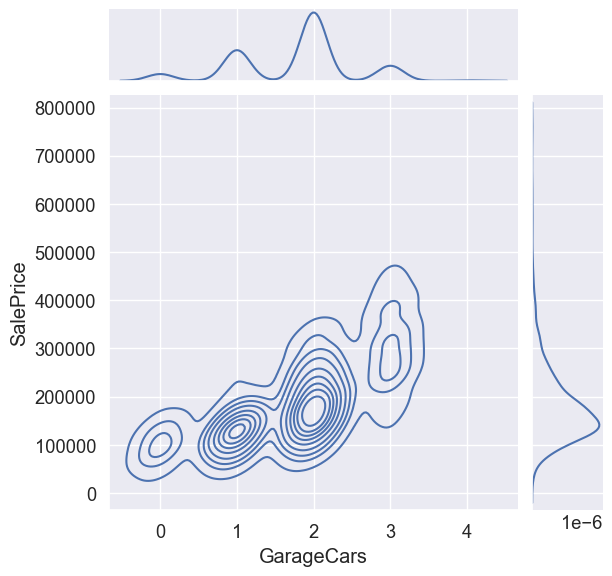

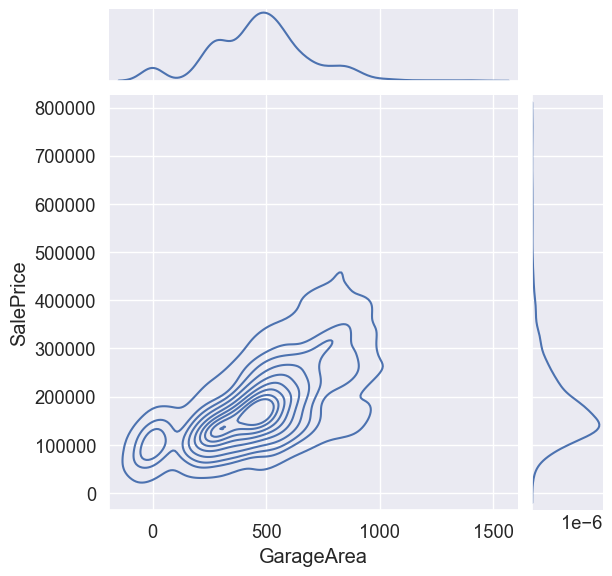

In [35]:
plt.figure(figsize=(10,8))
sns.jointplot(x=df["OverallQual"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["YearBuilt"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["YearRemodAdd"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["TotalBsmtSF"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["1stFlrSF"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["GrLivArea"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["FullBath"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["TotRmsAbvGrd"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["GarageCars"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["GarageArea"], y=df["SalePrice"], kind="kde")
plt.show()

**converting categorical variables into numerical variables using get dummies**

In [36]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]